Gerekli Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Görselleştirme ayarları

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

Dosyanın okunması


In [4]:
dosya_adi = 'Talent_Academy_Case_DT_2025.xlsx'
df = pd.read_excel(dosya_adi)


print("Veri Setinin İlk 5 Satırı:")
display(df.head())

print("\nVeri Seti Bilgileri:")
df.info()


print("\nSayısal Sütunlar İçin İstatistiksel Özet:")
display(df.describe())

Veri Setinin İlk 5 Satırı:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika



Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB

Sayısal Sütunlar İçin İstatistiksel Özet:


,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


Sayısal sütunların listesi

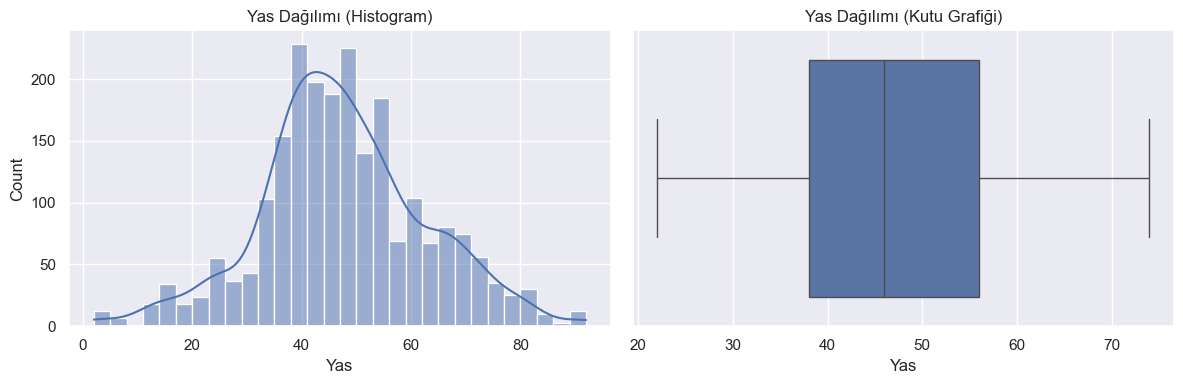

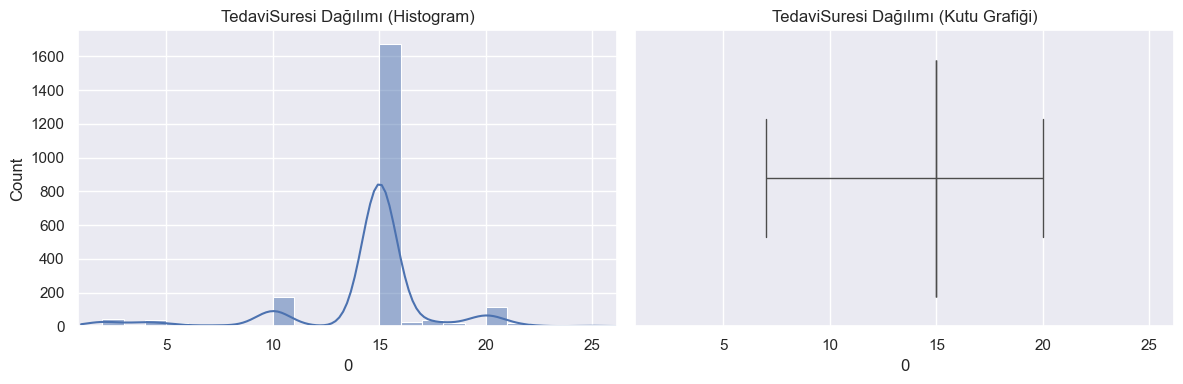

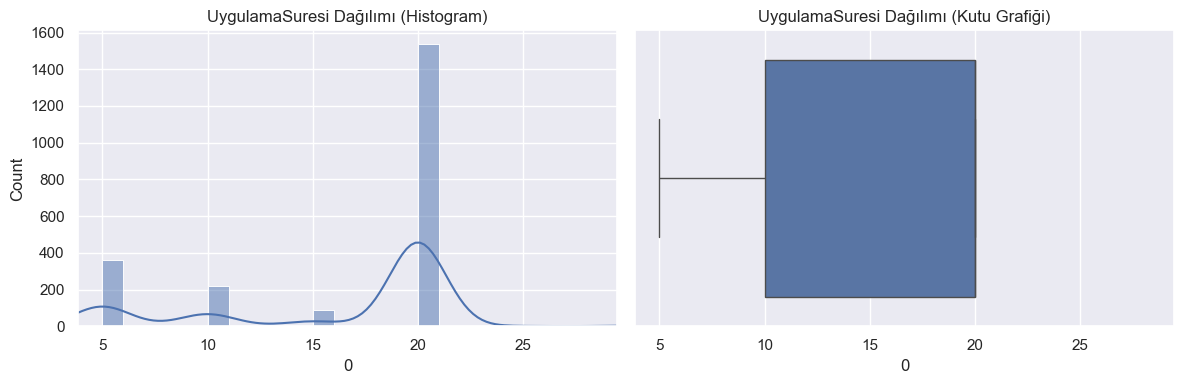

In [5]:
numerical_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi']


quantile_xlim = {}
for col in ['TedaviSuresi', 'UygulamaSuresi']:
    series = pd.to_numeric(df[col].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
    s = series.dropna()
    if len(s) > 0:
        lo, hi = s.quantile([0.01, 0.99])
        pad = 0.05 * (hi - lo if hi > lo else 1)
        quantile_xlim[col] = (max(0, lo - pad), hi + pad)

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))


    if df[col].dtype == 'O':
        series = pd.to_numeric(df[col].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
    else:
        series = pd.to_numeric(df[col], errors='coerce')
    data = series.dropna()

    # Süreler için tamsayı bin'ler, diğerleri için varsayılan
    if col in ['TedaviSuresi', 'UygulamaSuresi'] and data.size > 0:
        bins = np.arange(np.floor(data.min()), np.ceil(data.max()) + 1)
    else:
        bins = 30

    # Histogram
    sns.histplot(data, kde=True, bins=bins, ax=axes[0])
    axes[0].set_title(f'{col} Dağılımı (Histogram)')
    if col in quantile_xlim:
        axes[0].set_xlim(quantile_xlim[col])

    # Kutu grafiği: whisker'ları percentil ve aykırıları gizle
    sns.boxplot(x=data, ax=axes[1], whis=(5, 95), showfliers=False, orient='h')
    axes[1].set_title(f'{col} Dağılımı (Kutu Grafiği)')
    if col in quantile_xlim:
        axes[1].set_xlim(quantile_xlim[col])

    plt.tight_layout()
    plt.show()

Kategorik sütunların listesi

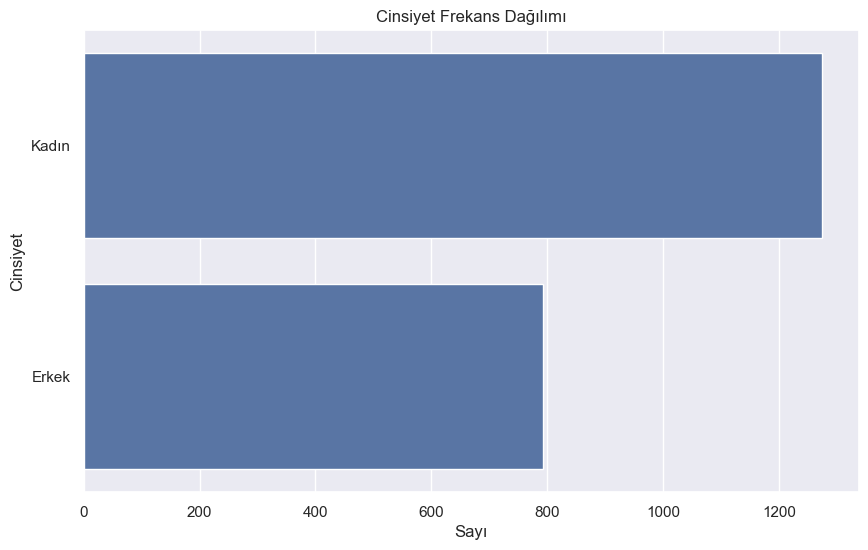

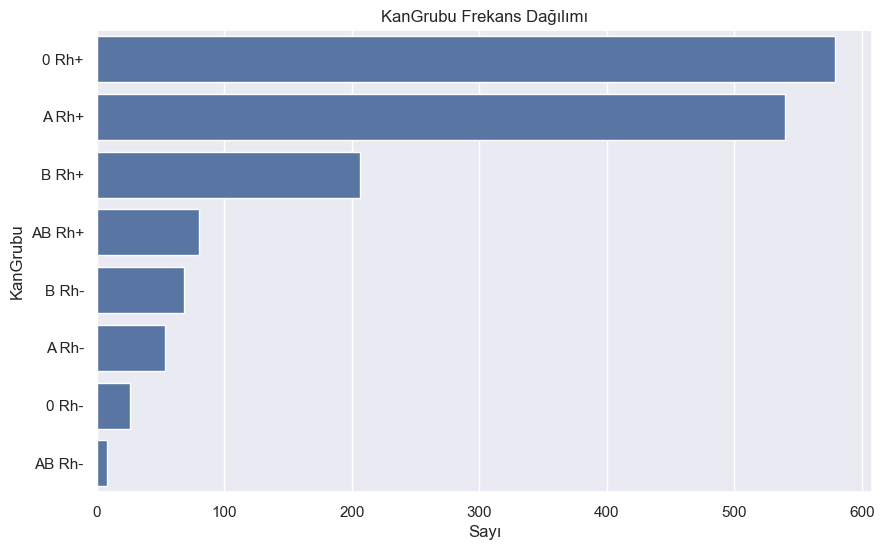

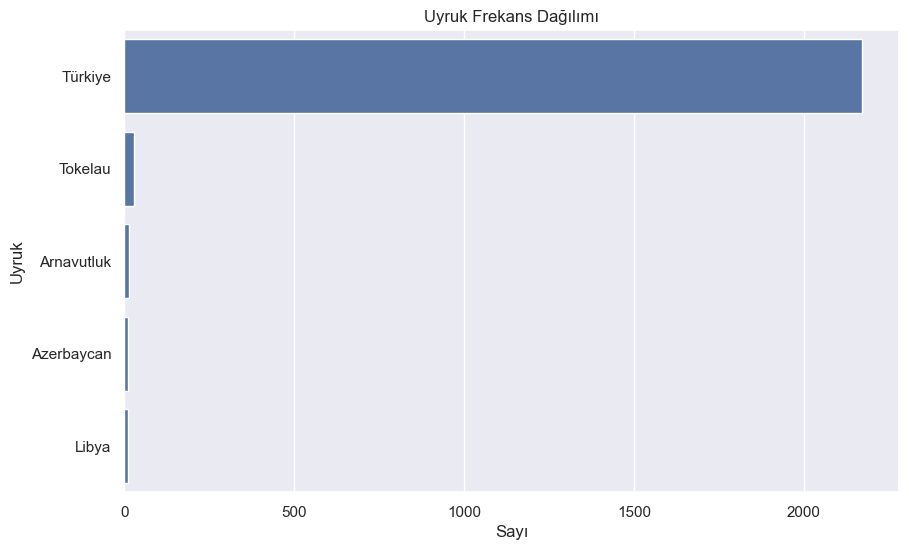

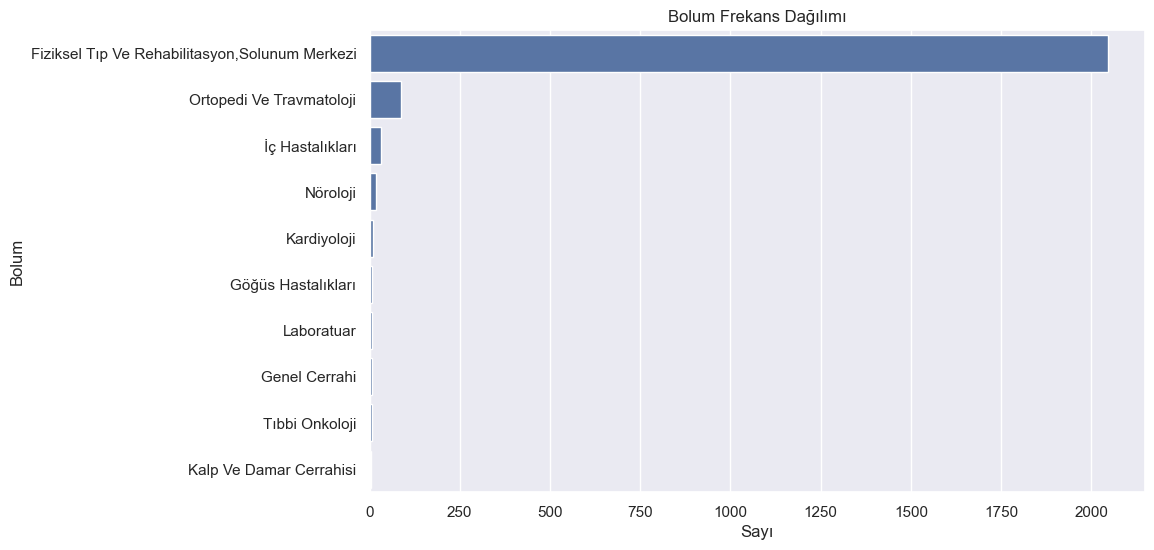

In [6]:
categorical_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'{col} Frekans Dağılımı')
    plt.xlabel('Sayı')
    plt.ylabel(col)
    plt.show()

Yaş ve tedavi süresi arasındaki ilişkiyi görselleştirmek

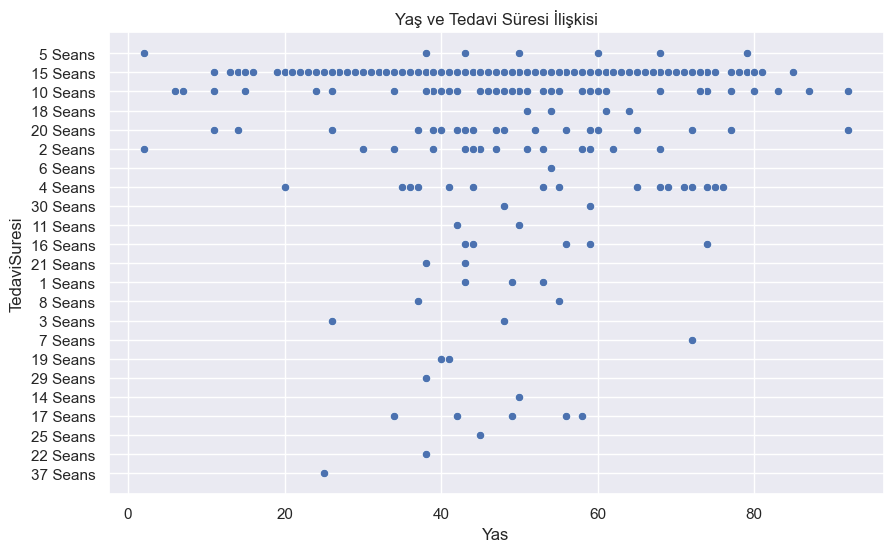

In [7]:
sns.scatterplot(x='Yas', y='TedaviSuresi', data=df)
plt.title('Yaş ve Tedavi Süresi İlişkisi')
plt.show()

Kategorik sütunların dağılımını saymak ve görselleştirmek.

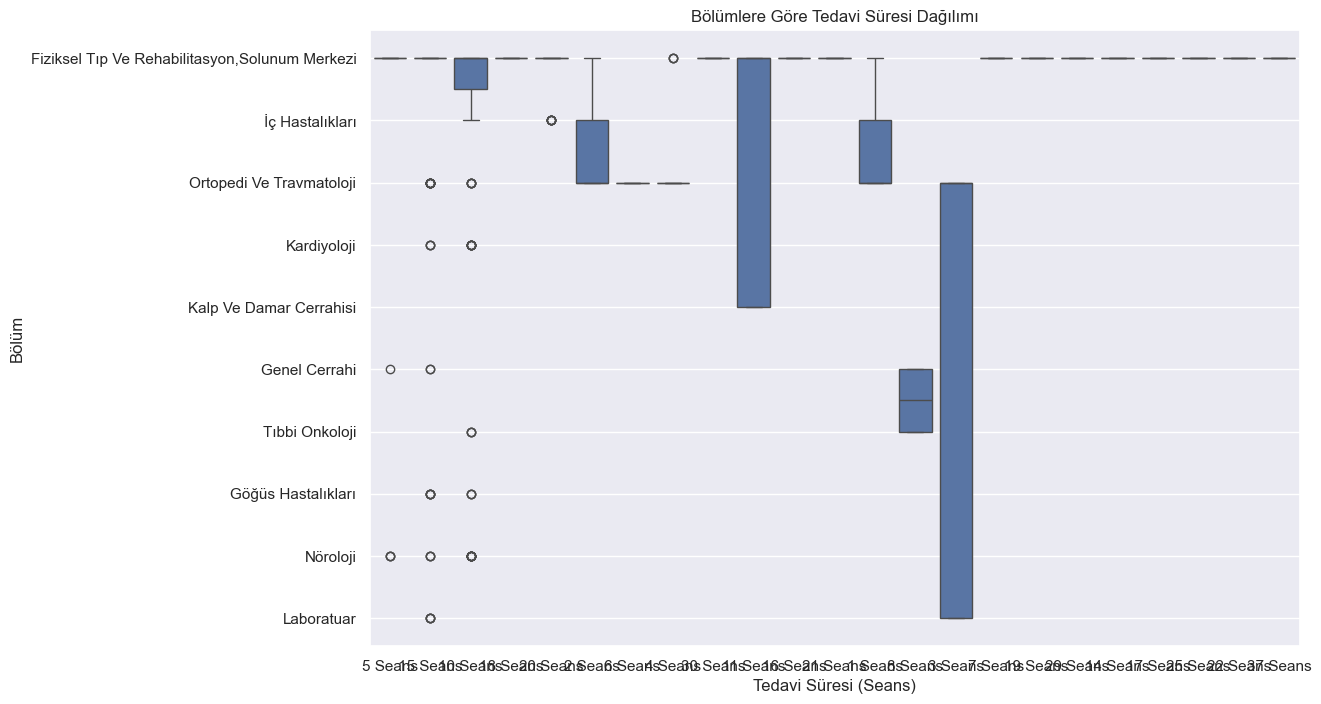

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='TedaviSuresi', y='Bolum', data=df)
plt.title('Bölümlere Göre Tedavi Süresi Dağılımı')
plt.xlabel('Tedavi Süresi (Seans)')
plt.ylabel('Bölüm')
plt.show()

Her sütundaki eksik veri sayısını ve oranını hesaplama

In [9]:
eksik_veri = df.isnull().sum()
eksik_veri_orani = (df.isnull().sum() / len(df)) * 100
eksik_veri_tablosu = pd.concat([eksik_veri, eksik_veri_orani], axis=1, keys=['Eksik Veri Sayısı', 'Oran (%)'])
print(eksik_veri_tablosu[eksik_veri_tablosu['Eksik Veri Sayısı'] > 0])

                 Eksik Veri Sayısı   Oran (%)
Cinsiyet                       169   7.561521
KanGrubu                       675  30.201342
KronikHastalik                 611  27.337808
Bolum                           11   0.492170
Alerji                         944  42.237136
Tanilar                         75   3.355705
UygulamaYerleri                221   9.888143


en sık tekrar eden değer (mode) ile doldurma

In [11]:
# Series üzerinde inplace kullanma, doğrudan atama yap
if df['KanGrubu'].isnull().any():
    mode_vals = df['KanGrubu'].mode(dropna=True)
    kan_grubu_modu = mode_vals.iat[0] if not mode_vals.empty else 'Bilinmiyor'
    df['KanGrubu'] = df['KanGrubu'].fillna(kan_grubu_modu)
    print(f"'KanGrubu' sütunundaki eksik veriler '{kan_grubu_modu}' ile dolduruldu.")

if df['Alerji'].isnull().any():
    df['Alerji'] = df['Alerji'].fillna('Bilinmiyor')
    print("'Alerji' sütunundaki eksik veriler 'Bilinmiyor' ifadesi ile dolduruldu.")


if 'KronikHastalik' in df.columns and df['KronikHastalik'].isnull().any():
    df['KronikHastalik'] = df['KronikHastalik'].fillna('Bilinmiyor')
    print("'KronikHastalik' sütunundaki eksik veriler 'Bilinmiyor' ile dolduruldu.")

# Eksik verileri tekrar kontrol et
print("\nEksik veri doldurma sonrası durum:")
print(df.isnull().sum())


Eksik veri doldurma sonrası durum:
HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu             0
Uyruk                0
KronikHastalik       0
Bolum               11
Alerji               0
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64


Eksik değerleri belirlemek ve oranlarını raporlamak

In [12]:
alerji_dummies = df['Alerji'].str.get_dummies(sep=',')


alerji_dummies = alerji_dummies.add_prefix('Alerji_')


df = pd.concat([df, alerji_dummies], axis=1)


df.drop('Alerji', axis=1, inplace=True)

print("\n'Alerji' sütunu işlendi ve yeni sütunlar eklendi:")
display(df.head())


'Alerji' sütunu işlendi ve yeni sütunlar eklendi:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,TedaviSuresi,...,Alerji_POLEN,Alerji_Polen,Alerji_SUCUK,Alerji_Sucuk,Alerji_TOZ,Alerji_Toz,Alerji_VOLTAREN,Alerji_Voltaren,Alerji_Volteren,Alerji_Yer Fıstığı
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,...,0,0,0,0,1,0,0,0,0,0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,...,0,0,0,0,0,0,0,0,0,0
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,...,0,0,0,0,0,0,0,0,0,0
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,...,0,0,0,0,0,0,0,0,0,0
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,...,0,0,0,0,0,0,0,0,0,0


Alerji' metin sütununu çoklu ikili sütunlara ayırmak ve ana tabloya eklemek

In [13]:
df = pd.get_dummies(df, columns=['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum'], drop_first=True)

print("\nKategorik değişkenler sayısala dönüştürüldü:")
display(df.head())


Kategorik değişkenler sayısala dönüştürüldü:


,HastaNo,Yas,KronikHastalik,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,Alerji_ARVELES,Alerji_Bilinmiyor,...,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp Ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları
0,145134,60,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,0,0,...,True,False,False,False,False,False,False,False,False,False
1,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,0,1,...,True,False,False,False,False,False,False,False,False,False
2,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,0,1,...,True,False,False,False,False,False,False,False,False,False
3,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika,0,1,...,True,False,False,False,False,False,False,False,False,False
4,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,0,1,...,True,False,False,False,False,False,False,False,False,False


Kategorik değişkenleri one-hot ile dönüştürmek ve sonuçları görüntülemek

In [14]:
from sklearn.preprocessing import StandardScaler


df_processed = df.copy()


df_processed['UygulamaSuresi'] = df_processed['UygulamaSuresi'].str.extract(r'(\d+)').astype(int)


df_processed['TedaviSuresi'] = df_processed['TedaviSuresi'].str.extract(r'(\d+)').astype(int)



print("'UygulamaSuresi' sütununun yeni tipi:", df_processed['UygulamaSuresi'].dtype)
print("'TedaviSuresi' sütununun yeni tipi:", df_processed['TedaviSuresi'].dtype)


cols_to_scale = ['Yas', 'UygulamaSuresi', 'TedaviSuresi']

# StandardScaler nesnesini oluştur
scaler = StandardScaler()

# Seçilen sütunları ölçeklendir ve DataFrame'de güncelle
df_processed[cols_to_scale] = scaler.fit_transform(df_processed[cols_to_scale])

print("\nSayısal sütunlar standartlaştırıldı:")
display(df_processed[cols_to_scale].describe())

'UygulamaSuresi' sütununun yeni tipi: int64
'TedaviSuresi' sütununun yeni tipi: int64

Sayısal sütunlar standartlaştırıldı:


,Yas,UygulamaSuresi,TedaviSuresi
count,2.235000e+03,2.235000e+03,2.235000e+03
mean,-1.525998e-16,-1.422675e-16,-1.430623e-17
std,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.981018e+00,-2.165733e+00,-3.643699e+00
25%,-6.134119e-01,-1.048813e+00,1.152058e-01
50%,-8.727716e-02,5.467877e-01,1.152058e-01
75%,5.703912e-01,5.467877e-01,1.152058e-01
max,2.937997e+00,4.535789e+00,6.022057e+00


Sayısal sütunları standartlaştırmak (scaling) ve özet istatistikleri görüntülemek

In [15]:
# Model için gereksiz olan orijinal metin ve ID sütunlarının listesi
cols_to_drop = ['HastaNo', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'KronikHastalik']


existing_cols_to_drop = [col for col in cols_to_drop if col in df_processed.columns]

if existing_cols_to_drop:
    df_processed.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Şu gereksiz sütunlar kaldırıldı: {existing_cols_to_drop}")
else:
    print("Kaldırılacak gereksiz sütun bulunamadı, zaten temizlenmiş.")


print("\nVERİ SETİNİN SON HALİ (İLK 5 SATIR):")
display(df_processed.head())

print("\nSON VERİ SETİNİN YAPISI:")
df_processed.info()


Şu gereksiz sütunlar kaldırıldı: ['HastaNo', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'KronikHastalik']

VERİ SETİNİN SON HALİ (İLK 5 SATIR):


,Yas,TedaviSuresi,UygulamaSuresi,Alerji_ARVELES,Alerji_Bilinmiyor,Alerji_CORASPIN,Alerji_GRIPIN,Alerji_GRİPİN,Alerji_NOVALGIN,Alerji_Novalgin,...,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp Ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları
0,0.833459,-2.569726,0.546788,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,-1.271080,0.115206,0.546788,0,1,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,-1.271080,0.115206,0.546788,0,1,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,-1.271080,0.115206,-1.846613,0,1,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
4,-1.271080,0.115206,0.546788,0,1,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False



SON VERİ SETİNİN YAPISI:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Yas                             2235 non-null   float64
 1   TedaviSuresi                    2235 non-null   float64
 2   UygulamaSuresi                  2235 non-null   float64
 3   Alerji_ARVELES                  2235 non-null   int64  
 4   Alerji_Bilinmiyor               2235 non-null   int64  
 5   Alerji_CORASPIN                 2235 non-null   int64  
 6   Alerji_GRIPIN                   2235 non-null   int64  
 7   Alerji_GRİPİN                   2235 non-null   int64  
 8   Alerji_NOVALGIN                 2235 non-null   int64  
 9   Alerji_Novalgin                 2235 non-null   int64  
 10  Alerji_POLEN                    2235 non-null   int64  
 11  Alerji_Polen                    2235 non-null   int64  
 12  Alerji_S